<a href="https://colab.research.google.com/github/Grecia2727/AguaMetrix/blob/master/02_K_Vecinos_Mas_Cercanos_Ejercicio_Propuesto_Enviado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Vecinos más cercanos: Ejercicio Propuesto 

!Bienvenido al Proyecto KNN! Este será un ejercicio simple muy similar a la primera, excepto que se le dará otro conjunto de datos. Siga las instrucciones a continuación.

## Importación de librerias
**Importar pandas,seaborn, y las librerias usuales.**

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Obtener los datos
** Lea el archivo csv KNN_Project_Data a un dataframe **

In [88]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3_k_vecinos/KNN_Project_Data")

**Revise las primeras filas del dataframe.**

In [23]:
df.head()

XVPM         GWYH  ...         JHZC  TARGET CLASS
0  1636.670614   817.988525  ...   845.136088             0
1  1013.402760   577.587332  ...   861.081809             1
2  1300.035501   820.518697  ...  1647.186291             1
3  1059.347542  1066.866418  ...  1450.935357             0
4  1018.340526  1313.679056  ...  1899.850792             0

[5 rows x 11 columns]

In [89]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

In [46]:
df.tail(5)

XVPM         GWYH  ...         JHZC  TARGET CLASS
995  1343.060600  1289.142057  ...  2127.628290             0
996   938.847057  1142.884331  ...   567.200545             1
997   921.994822   607.996901  ...  1943.304912             1
998  1157.069348   602.749160  ...  1331.879020             1
999  1287.150025  1303.600085  ...   952.895751             1

[5 rows x 11 columns]

# Análisis Exploratorio de Datos

Dado que estos datos son artificiales, haremos un pairplot grande con Seaborn.

** Use seaborn con el dataframe para crear un pairplot con el hue indicado por la columna TARGET CLASS. **

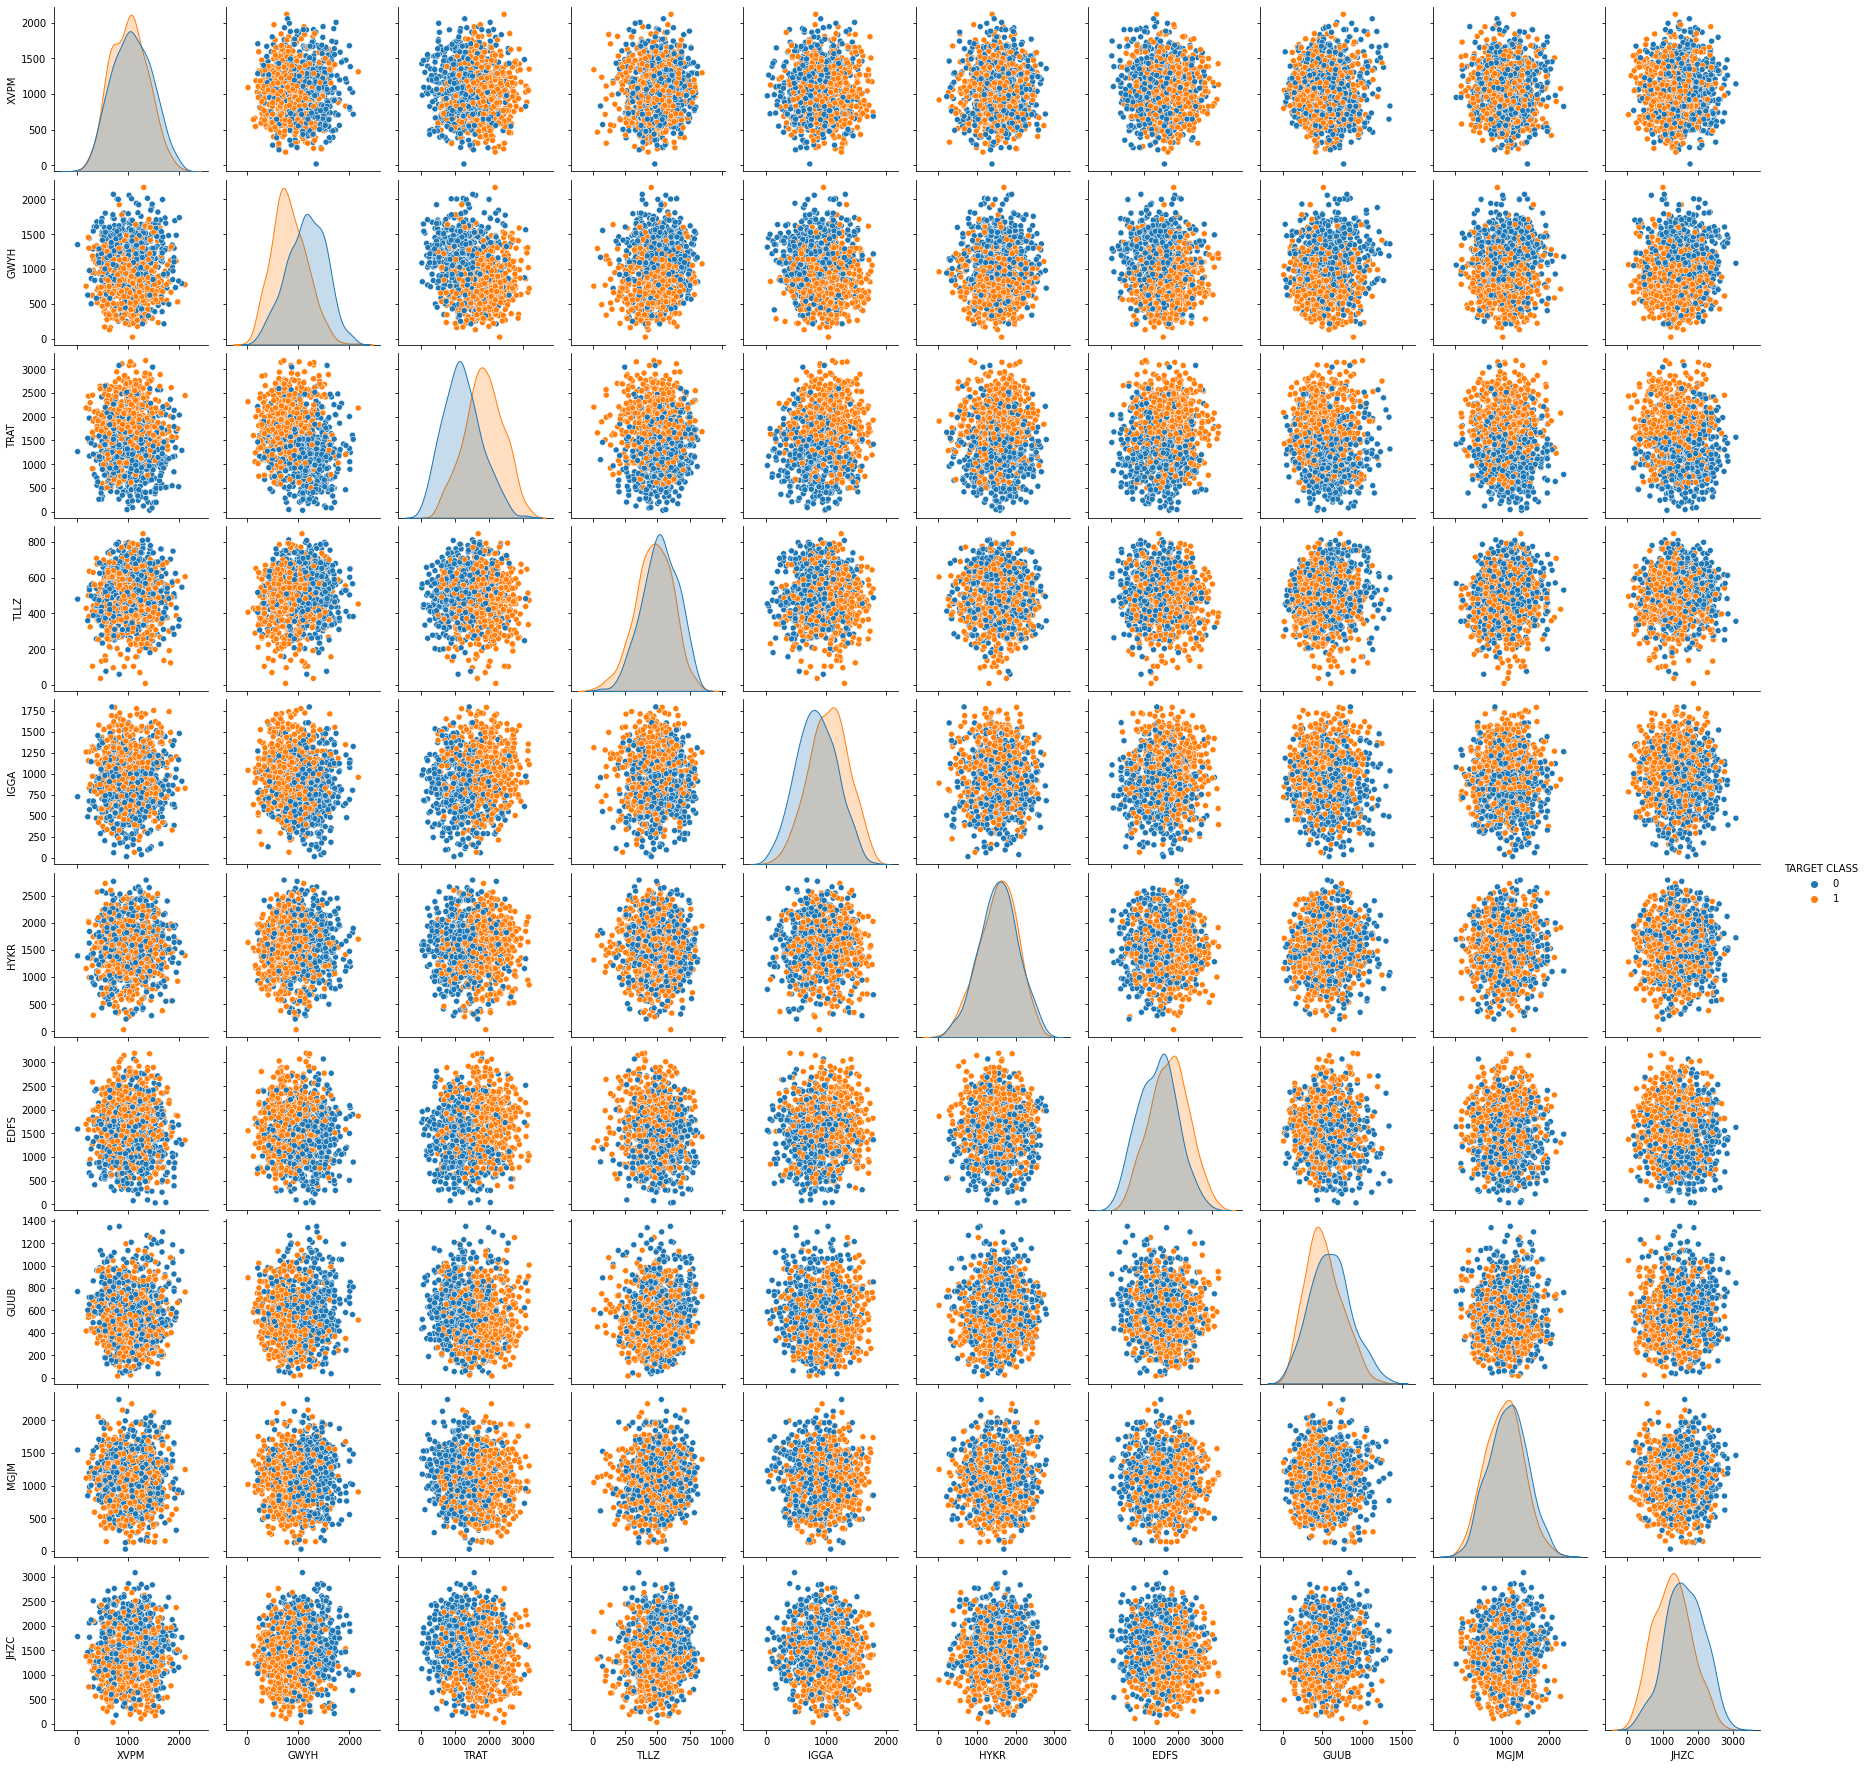

In [ ]:
sns.pairplot(df, hue="TARGET CLASS")

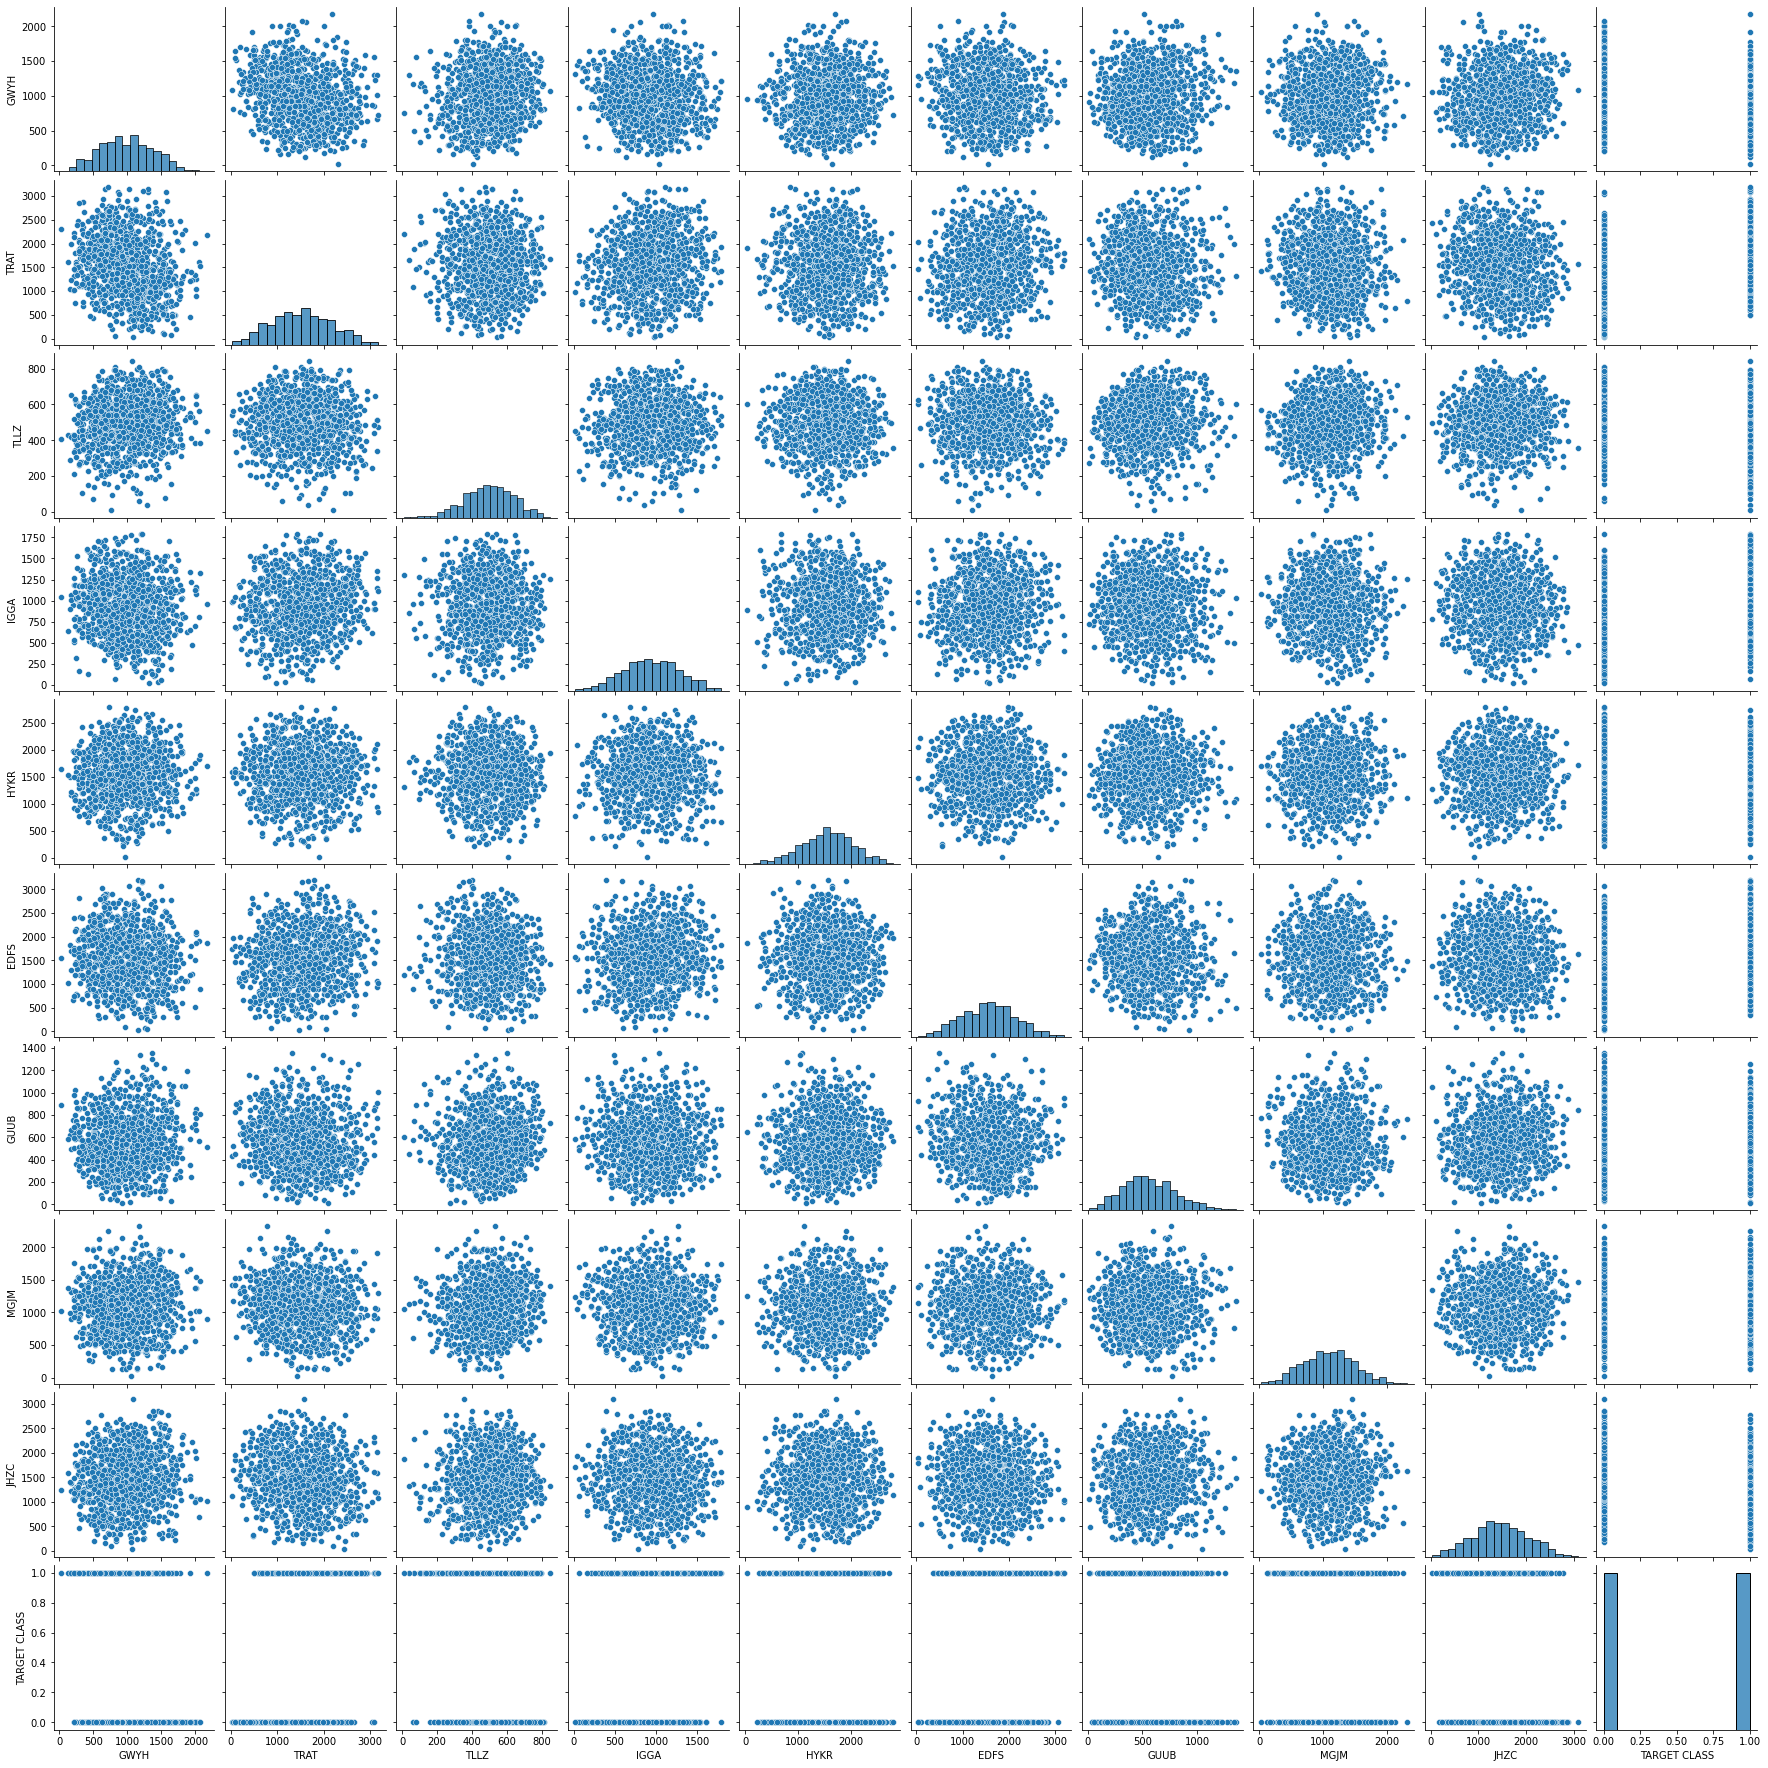

In [ ]:
sns.pairplot(df)

# Estandarizar las Variables

** Importe StandardScaler de Scikit learn.**

In [90]:
from sklearn.preprocessing import StandardScaler

** Create un objeto llamado scaler de la clase StandardScaler().**

In [91]:
scaler = StandardScaler()

** Ajuste scaler a las características.**

In [92]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use el método .transform() para transformar las características a una versión con la escala.**

In [93]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [94]:
df.columns[:-1]

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC'],
      dtype='object')

**Convierta las características escaladas a un dataframe y verifique las primeros registros de este dataframe para asegurarse de que el escalado funcionó.**

In [95]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT  ...      GUUB      MGJM      JHZC
0  1.568522 -0.443435  1.619808  ... -0.932794  1.008313 -1.069627
1 -0.112376 -1.056574  1.741918  ... -0.461864  0.258321 -1.041546
2  0.660647 -0.436981  0.775793  ...  1.149298  2.184784  0.342811
3  0.011533  0.191324 -1.433473  ... -0.888557  0.162310 -0.002793
4 -0.099059  0.820815 -0.904346  ...  0.391419 -1.365603  0.787762

[5 rows x 10 columns]

# División en conjunto de entrenamiento y prueba

**Utilice train_test_split para dividir sus datos en un conjunto de entrenamiento y un conjunto de prueba, utilice una semilla.**

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.30)

**El código anterior también puede ser expresado de la siguiente manera:**

In [34]:
X = scaled_features
y = df['TARGET CLASS']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=100)

# Use KNN

**Importar KNeighborsClassifier desde scikit learn.**

In [105]:
from sklearn.neighbors import KNeighborsClassifier

**Crea una instancia de modelo KNN con n_neighbors = 1**

In [106]:
knn = KNeighborsClassifier(n_neighbors=1)

**Ajuste este modelo KNN a los datos de entrenamiento.**

In [107]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predicciones y evaluaciones
¡Evaluemos nuestro modelo KNN!

**Use el método predict para predecir valores usando su modelo KNN y X_test.**

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
pred = knn.predict(X_test)

** Crea una matriz de confusión y un informe de clasificación.**

In [110]:
print(confusion_matrix(y_test,pred))

[[109  38]
 [ 42 111]]


**Reporte de clasificación:**

In [111]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       147
           1       0.74      0.73      0.74       153

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



# Elegir un valor K
¡Avancemos y usemos el método del codo para elegir un buen valor K!

** Cree un bucle for que entrene varios modelos KNN con diferentes valores k, luego realice un seguimiento de tasa_erro para cada uno de estos modelos con una lista. Consulte el ejemplo si está confundido en este paso. **

In [112]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

**Ahora crea la siguiente gráfica usando la información del bucle for.**

Text(0, 0.5, 'Tasa de Error')

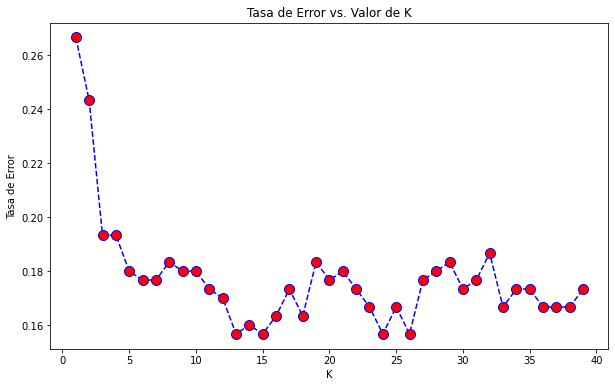

In [113]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

## Reentrene con un nuevo valor K

** Reentrene su modelo con el mejor valor K (depende de usted esta decisión) y vuelva a hacer el informe de clasificación y la matriz de confusión. **

In [114]:
# AHORA CON K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=5


[[119  28]
 [ 26 127]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       147
           1       0.82      0.83      0.82       153

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



# Buen trabajo!